# Lab eval - 4

----

Name: Abirami S
Roll No: CB.EN.U4CSE20202

# Part 1

In [104]:

import pandas as pd
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
from scipy.stats import mode
import numpy as np
path_data = '../../../assets/data/'

from mpl_toolkits.mplot3d import Axes3D
import math
import scipy.stats as stats
plt.style.use('ggplot')

from sklearn.preprocessing import StandardScaler
from sklearn import datasets, neighbors



from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [105]:
df = pd.read_csv('advertising.csv')

In [106]:
df

,Unnamed: 0.1,Unnamed: 0,TV,Radio,Newspaper,Sales
0,0,1,230.1,37.8,69.2,22.1
1,1,2,44.5,39.3,45.1,10.4
2,2,3,17.2,45.9,69.3,9.3
3,3,4,151.5,41.3,58.5,18.5
4,4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...,...
195,195,196,38.2,3.7,13.8,7.6
196,196,197,94.2,4.9,8.1,9.7
197,197,198,177.0,9.3,6.4,12.8
198,198,199,283.6,42.0,66.2,25.5


In [112]:
df = df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1)

In [113]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Q1

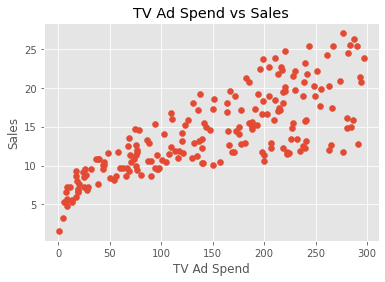

In [114]:
plt.scatter(df['TV'], df['Sales'])
plt.xlabel("TV Ad Spend")
plt.ylabel("Sales")
plt.title("TV Ad Spend vs Sales")
plt.show()

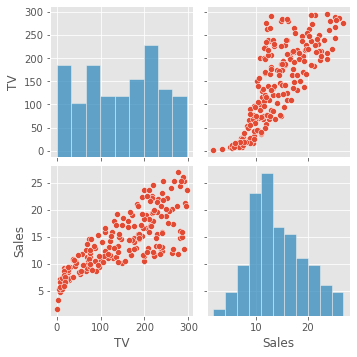

In [115]:
data = pd.DataFrame()
data['TV']=df['TV']
data['Sales']=df['Sales']
sns.pairplot(data)
plt.show()

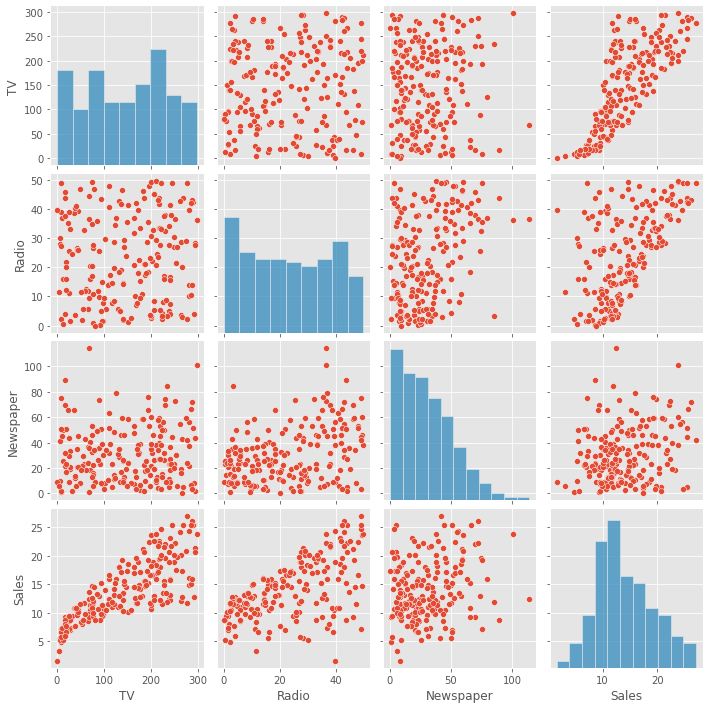

In [116]:
sns.pairplot(df)
plt.show()

<AxesSubplot:>

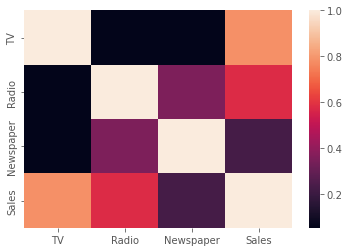

In [117]:
sns.heatmap(df.corr())

# Q2

In [118]:
from sklearn.linear_model import LinearRegression

In [119]:
model = LinearRegression()

model.fit(df[['TV']], df['Sales'])

LinearRegression()

In [120]:
print(model.coef_)
print(model.intercept_)

[0.04753664]
7.0325935491276965


In [121]:
from statsmodels.formula.api import ols

In [122]:
linear_model = ols('TV ~ Sales',
                   data=df).fit()

In [123]:
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     TV   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.47e-42
Time:                        16:43:45   Log-Likelihood:                -1079.2
No. Observations:                 200   AIC:                             2162.
Df Residuals:                     198   BIC:                             2169.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -33.4502     10.897     -3.070      0.0

In [124]:
import statsmodels.api as sm

In [125]:
fig = plt.figure(figsize=(14, 8))

<Figure size 1008x576 with 0 Axes>

In [126]:
fig = sm.graphics.plot_regress_exog(linear_model,
                                    'Sales',
                                    fig=fig)

eval_env: 1


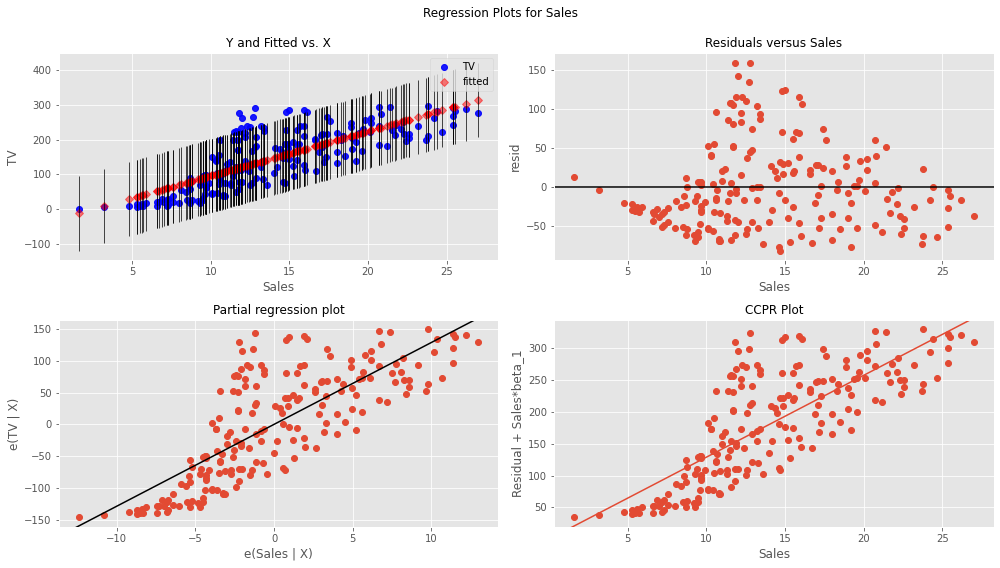

In [127]:
fig

# Q3

In [128]:
new_tv_ads = pd.DataFrame(df['TV'])

predictions = model.predict(new_tv_ads)
predictions

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

In [129]:
predictions = pd.DataFrame(predictions)
predictions

,0
0,17.970775
1,9.147974
2,7.850224
3,14.234395
4,15.627218
...,...
195,8.848493
196,11.510545
197,15.446579
198,20.513985


<AxesSubplot:>

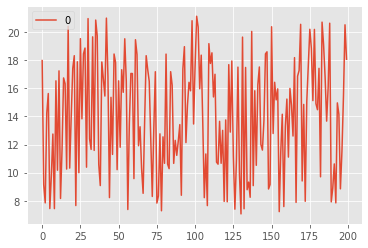

In [130]:
predictions.plot()

# Q4

/Users/abi03/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


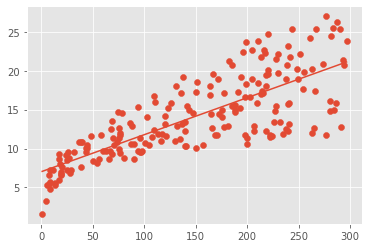

In [131]:
plt.scatter(df['TV'], df['Sales'])

model = LinearRegression()
model.fit(df[['TV']], df['Sales'])

x_values = [min(df['TV']), max(df['TV'])]

x_values = pd.DataFrame(x_values)

y_values = model.predict(x_values)
x_values = x_values.values

plt.plot(x_values, y_values)

# Q5

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.47e-42
Time:                        16:43:52   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

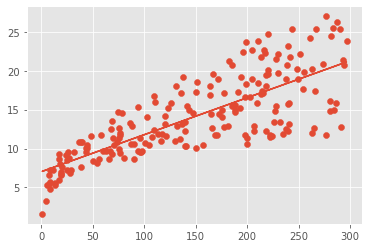

In [132]:
tv_ads= pd.DataFrame(df['TV'])
sales = pd.DataFrame(df['Sales'])
X = sm.add_constant(tv_ads)


model = sm.OLS(sales, X).fit()


print(model.summary())

plt.scatter(tv_ads.values, sales.values)

# Line plot
X = pd.DataFrame(X)
plt.plot(tv_ads.values, model.predict(X))

# Show the plot
plt.show()


# Part 2 

# Q1

In [133]:
df1 = pd.read_csv('pima-indians-diabetes.csv')
df1

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [134]:
column_names = {
    "6": "f1",
    "148": "f2",
    "72": "f3",
    "35": "f4",
    "0": "f5",
    "33.6": "f6",
    "0.627": "f7",
    "50": "f8",
    "1": "class",
}

df1 = df1.rename(columns=column_names)
df1


,f1,f2,f3,f4,f5,f6,f7,f8,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [135]:
df1.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,class
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [136]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      767 non-null    int64  
 1   f2      767 non-null    int64  
 2   f3      767 non-null    int64  
 3   f4      767 non-null    int64  
 4   f5      767 non-null    int64  
 5   f6      767 non-null    float64
 6   f7      767 non-null    float64
 7   f8      767 non-null    int64  
 8   class   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [137]:
df.to_csv("pima-indians-diabetes-modified.csv", index=False)


In [138]:
X = df1.drop('class', axis=1)
y = df1['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Q2

In [142]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


scaler.fit(X_train)


X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Q3

In [143]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=5)


knn.fit(X_train_scaled, y_train)


predictions = knn.predict(X_test_scaled)
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

# Q4

In [144]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

print(cm)

[[81 16]
 [26 31]]


/var/folders/zx/qzf1dd0144z_jcmhg8h48mxc0000gn/T/ipykernel_27760/3824287425.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


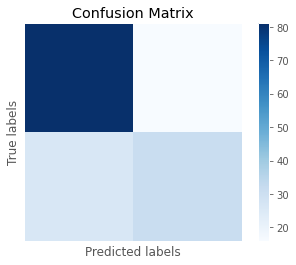

In [145]:

plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.xticks([], [])
plt.yticks([], [])
plt.show()

# Q5

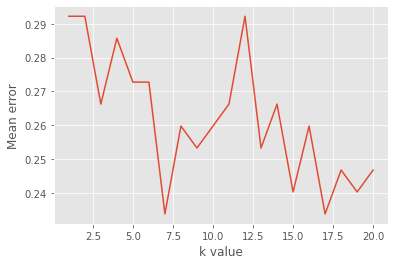

In [146]:
mean_errors = []


for k in range(1, 21):
 
  knn = KNeighborsClassifier(n_neighbors=k)
  
  
  knn.fit(X_train_scaled, y_train)

  predictions = knn.predict(X_test_scaled)
  
  
  mean_error = 1 - knn.score(X_test_scaled, y_test)
  
 
  mean_errors.append(mean_error)
  

plt.plot(range(1, 21), mean_errors)
plt.xlabel("k value")
plt.ylabel("Mean error")
plt.show()

